<a href="https://colab.research.google.com/github/PradeepKumarM30/practiceAndLearn/blob/main/transferlearning/step1effnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1 : Import Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


# TASK 2 : Clone & Explore dataset

In [26]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


In [37]:
#set the path to the main dir
import os
main_dir = '/content/datasets/Data'
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir,'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir,'NORMAL')

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir,'COVID19')

#directory with the testing normal images
test_normal_dir = os.path.join(test_dir,'NORMAL')


In [38]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(367).jpg', 'COVID19(348).jpg', 'COVID19(280).jpg', 'COVID-19 (162).jpg', 'COVID-19 (178).jpg', 'COVID19(59).jpg', 'COVID19(299).jpg', 'COVID19(413).jpg', 'COVID19(179).jpg', 'COVID19(516).jpg']
['NORMAL(1509).jpg', 'NORMAL(487).jpg', 'NORMAL(249).jpg', 'NORMAL(1557).jpg', 'NORMAL(41).jpg', 'NORMAL(1571).jpg', 'NORMAL(740).jpg', 'NORMAL(132).jpg', 'NORMAL(1177).jpg', 'NORMAL(1000).jpg']
['COVID-19 (871).jpg', 'COVID19(8).jpg', 'COVID19(58).jpg', 'COVID19(84).jpg', 'COVID-19 (479).jpg', 'COVID19(198).jpg', 'COVID-19 (750).jpg', 'COVID19(158).jpg', 'COVID19(505).jpg', 'COVID19(194).jpg']
['NORMAL(922).jpg', 'NORMAL(458).jpg', 'NORMAL(1377).jpg', 'NORMAL(136).jpg', 'NORMAL(142).jpg', 'NORMAL(996).jpg', 'NORMAL(108).jpg', 'NORMAL(324).jpg', 'NORMAL(140).jpg', 'NORMAL(737).jpg']


In [39]:
#print the total no of images present in each dir
print("Total images present in the training set:",len(train_covid_names+train_normal_names))
print("Total images present in the testing set:",len(test_covid_names+test_normal_names))


Total images present in the training set: 1811
Total images present in the testing set: 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(367).jpg', '/content/datasets/Data/train/COVID19/COVID19(348).jpg', '/content/datasets/Data/train/COVID19/COVID19(280).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (162).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (178).jpg', '/content/datasets/Data/train/COVID19/COVID19(59).jpg', '/content/datasets/Data/train/COVID19/COVID19(299).jpg', '/content/datasets/Data/train/COVID19/COVID19(413).jpg']      ['/content/datasets/Data/train/NORMAL/NORMAL(1509).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(487).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(249).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1557).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(41).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1571).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(740).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(132).jpg']


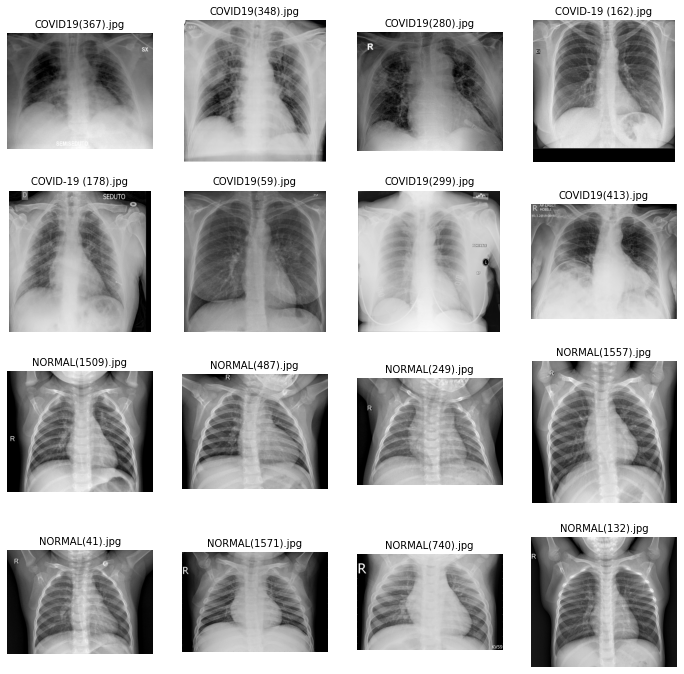

In [40]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg


#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir,filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic,'    ',normal_pic)
#merge the covid and normal list
merged_list = covid_pic + normal_pic
for i,img_path in enumerate(merged_list):
  data = img_path.split('/',)[-1]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize = 10)
  plt.imshow(img,cmap='gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [53]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(featurewise_center=True,
                                featurewise_std_normalization=True,
                                rotation_range=20,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

#https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/
dgen_validation = ImageDataGenerator(featurewise_center=True,
                                featurewise_std_normalization=True)
dgen_test = ImageDataGenerator(featurewise_center=True,
                                featurewise_std_normalization=True)

train_generator = dgen_train.flow_from_directory(train_dir, 
                                                 target_size = (128,128),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir, 
                                                 target_size = (128,128),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir, 
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [48]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [49]:
#get the image shape
train_generator.image_shape

(128, 128, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [44]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 37, 37, 64)       

# TASK 6 : Compile & Train the Model

In [45]:
#compile the model
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [46]:
#train the model
history = model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

Epoch 1/5
46/46 [==============================] - 57s 1s/step - loss: 1.0595 - accuracy: 0.7626 - val_loss: 0.3605 - val_accuracy: 0.8923
Epoch 2/5
46/46 [==============================] - 54s 1s/step - loss: 0.2811 - accuracy: 0.8875 - val_loss: 0.2699 - val_accuracy: 0.9530
Epoch 3/5
46/46 [==============================] - 53s 1s/step - loss: 0.1910 - accuracy: 0.9303 - val_loss: 0.2217 - val_accuracy: 0.9337
Epoch 4/5
46/46 [==============================] - 53s 1s/step - loss: 0.1843 - accuracy: 0.9365 - val_loss: 0.1414 - val_accuracy: 0.9558
Epoch 5/5
46/46 [==============================] - 54s 1s/step - loss: 0.1720 - accuracy: 0.9282 - val_loss: 0.1803 - val_accuracy: 0.9586


# TASK 7 : Performance Evaluation

In [57]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

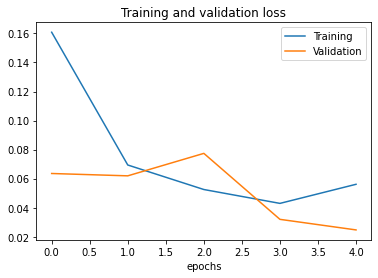

In [58]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

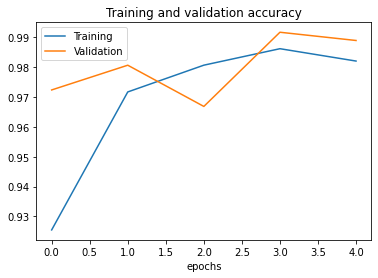

In [59]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [61]:
# get the test acuarcy and loss
test_loss, test_accuracy = custom_model.evaluate(test_generator)
print('test loss : {} test acc : {}'.format(test_loss,test_accuracy))


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 13s 783ms/step - loss: 0.0365 - accuracy: 0.9814
test loss : 0.03651377931237221 test acc : 0.9814049601554871


# TASK 8 : Prediction On New Data

In [63]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename 
  img = image.load_img(img_path,target_size= (128,128))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis = 0)
  prediction = custom_model.predict(images)
  print(filename)


  if prediction == 0:
    print('Covid detected')
  else:
    print('Your report is normal')



Saving NORMAL(10).jpeg to NORMAL(10).jpeg
NORMAL(10).jpeg
Your report is normal


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mnet = MobileNetV2(include_top = False, pooling = 'avg', weights = 'imagenet',
                    input_shape = (128,128,3))
mnet.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
def create_model():
  new_model = Sequential([
                          mnet,
                          Flatten(),
                          Dropout(0.5),
                          Dense(1,activation='sigmoid'),
                          ])
  new_model.layers[0].trainable = False
  new_model.compile(Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = 'accuracy')
  
  return new_model

custom_model = create_model()
custom_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 1280)              2257984   
_________________________________________________________________
flatten_5 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
history = custom_model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

Epoch 1/5
46/46 [==============================] - 93s 1s/step - loss: 0.3040 - accuracy: 0.8682 - val_loss: 0.1480 - val_accuracy: 0.9254
Epoch 2/5
46/46 [==============================] - 51s 1s/step - loss: 0.1323 - accuracy: 0.9510 - val_loss: 0.1104 - val_accuracy: 0.9613
Epoch 3/5
46/46 [==============================] - 51s 1s/step - loss: 0.0991 - accuracy: 0.9614 - val_loss: 0.1029 - val_accuracy: 0.9586
Epoch 4/5
46/46 [==============================] - 51s 1s/step - loss: 0.0965 - accuracy: 0.9669 - val_loss: 0.0930 - val_accuracy: 0.9696
Epoch 5/5
46/46 [==============================] - 52s 1s/step - loss: 0.0766 - accuracy: 0.9710 - val_loss: 0.0992 - val_accuracy: 0.9696


In [50]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

effnet = EfficientNetB0(include_top = False, pooling = 'avg', weights = 'imagenet',
                    input_shape = (128,128,3))

effnet.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 128, 128, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [55]:
def create_model():
  #new_model = Sequential([
  #                        effnet,
  #                        Flatten(),
  #                        Dropout(0.5),
  #                        Dense(1,activation='sigmoid'),
  #                        ])
  new_model = Sequential([
                          effnet,
                          Flatten(),
                          Dense(256,activation='relu'),
                          Dropout(0.2),
                          Dense(256,activation='relu'),
                          Dropout(0.2),
                          Dense(256,activation='relu'),
                          Dropout(0.2),
                          Dense(1,activation='sigmoid')])
                        
  new_model.layers[0].trainable = False
  new_model.compile(Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = 'accuracy')
  
  return new_model

custom_model = create_model()
custom_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 flatten_5 (Flatten)         (None, 1280)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               327936    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 256)              

In [56]:
history = custom_model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
46/46 [==============================] - 61s 1s/step - loss: 0.1608 - accuracy: 0.9255 - val_loss: 0.0635 - val_accuracy: 0.9724
Epoch 2/5
46/46 [==============================] - 51s 1s/step - loss: 0.0694 - accuracy: 0.9717 - val_loss: 0.0619 - val_accuracy: 0.9807
Epoch 3/5
46/46 [==============================] - 52s 1s/step - loss: 0.0525 - accuracy: 0.9807 - val_loss: 0.0774 - val_accuracy: 0.9669
Epoch 4/5
46/46 [==============================] - 53s 1s/step - loss: 0.0430 - accuracy: 0.9862 - val_loss: 0.0320 - val_accuracy: 0.9917
Epoch 5/5
46/46 [==============================] - 51s 1s/step - loss: 0.0561 - accuracy: 0.9821 - val_loss: 0.0247 - val_accuracy: 0.9890
